This tutorial is inspired by the book of François chollet based on Tensorflow and Keras API...


Pytorch

In [1]:
# import the necessary modules

%matplotlib inline
import torch
from torch import nn
from torchvision import datasets
import matplotlib.pyplot as plt


Listing 2.1 Download the MNIST dataset

In [2]:
data_path = "./data"
mnist_train = datasets.MNIST(root=data_path, train=True, download=True)
mnist_test  = datasets.MNIST(root=data_path, train=False, download=True)

Contrary to what you can see in the book (Listing 2.1), here the variable mnist_train contains a sort of list of tuple 
<br>
where each tuple represents an image of a digit and its label. The same fact holds for mnist_test, but these data are 
<br>
used only during test.

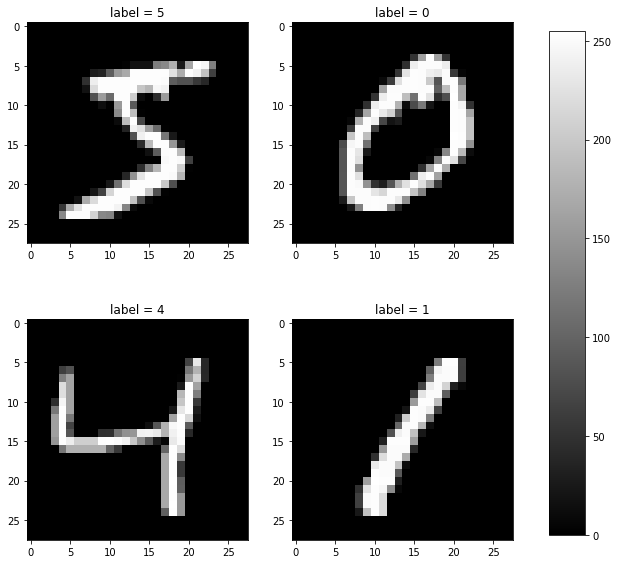

In [13]:
# for example, we will the four first sample in our training set

number_sample = 4

fig = plt.figure(figsize=(10,10))


for i in range(number_sample):
    image, label = mnist_train[i]
    ax = fig.add_subplot(2, 2, i+1)
    im = plt.imshow(image, cmap="gray")
    ax.set_title("label = " + str(label))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

# see https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots

In [19]:
# images in these both training and test dataset are of size 28*28
image, _ = mnist_train[0]
print(image.size)

(28, 28)


We see that an image is for size 28 * 28, therefore if we flatten the image to feed it to our neural network (an MLP) the 
input size is 784.

Listing 2.2 The network architecture

In [21]:
# First approach
# in this approch you need to know the input size and ouput size of a layer of your neural network

model1 = nn.Sequential(nn.Linear(784,512), nn.ReLU(), nn.Linear(512, 10), nn.Softmax(dim=1))


# Second approach
# in this approch you need only need to know ouput size of a layer of your neural network
# its input size will be automatically infer by Pytorch at runtime

model2 = nn.Sequential(nn.LazyLinear(512), nn.ReLU(), nn.LazyLinear(10), nn.Softmax(dim=1))


Listing 2.3 compilation

Instead of doing like in tensorflow/keras, in this we will define an optimizer, a loss function, and a metric function.

In [ ]:
learning_rate = 0.01

optimizer = torch.optim.RMSprop(model1.parameters(), lr = learning_rate)

loss_fn = nn.CrossEntropyLoss()

def accuracy(y_pred, y_true):
    """Compute accuracy in % between the predicted labels and true lables"""
    return (y_pred == y_true).mean() * 100

Todo:
- dataset with DataLoader
- write training loop, including validation loop
- train both model1 and model2
- test 


In [ ]:
n_epochs = 5

for epoch in range(n_epochs):
    for data in mnist_train:
        image, label = 